## **Importing Modules**

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

## **Data preprocessing**

In [2]:
#!pip install gdown

import gdown

url = 'https://drive.google.com/uc?export=download&id=15QfD1nPaPQaq0UyEdbiwuci-DiLY8nSm'
output = 'data.zip'
gdown.download(url, output, quiet=False)

#Dataset address
data_dir='./data.zip'

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zf:
    zf.extractall('./')
    print('Done downloading and extraction')

!rm './data.zip' 

import numpy as np
from glob import glob

orange_files = np.array(glob("/content/data/*/*/*"))

print('There are %d total chest xray images.' % len(orange_files))

Downloading...
From: https://drive.google.com/uc?export=download&id=15QfD1nPaPQaq0UyEdbiwuci-DiLY8nSm
To: /content/data.zip
441MB [00:05, 78.9MB/s]


Done downloading and extraction
There are 4626 total chest xray images.


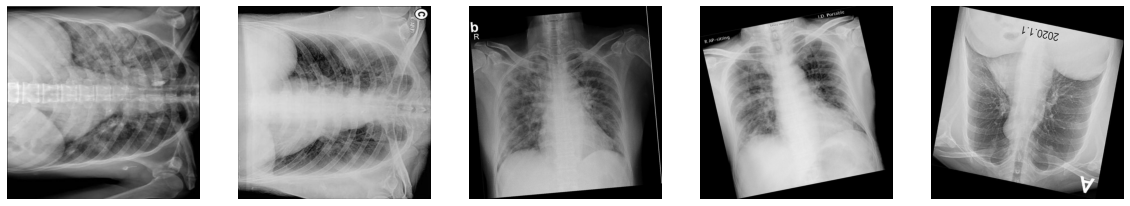

In [3]:
plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/data/train/covid/'))
    #img_path = os.path.join('../input/covid19-pneumonia-normal-chest-xray-pa-dataset/covid', file)
    img = plt.imread('/content/data/train/covid/' + img_path)
    ax = plt.subplot(1,5,i+1)
    plt.axis('off')
    #ax.title.set_text('covid19 Xrays')
    plt.imshow(img)

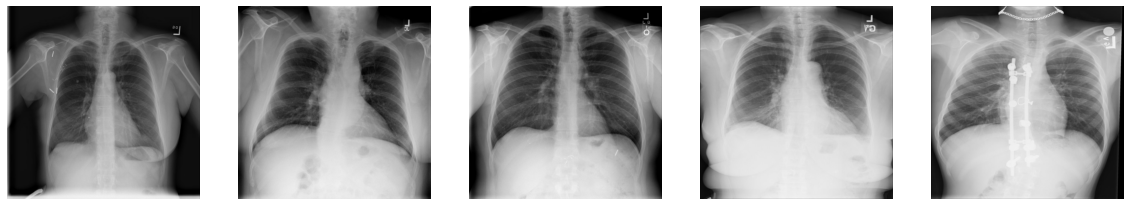

In [4]:
plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/data/train/normal/'))
    #img_path = os.path.join('../input/covid19-pneumonia-normal-chest-xray-pa-dataset/covid', file)
    img = plt.imread('/content/data/train/normal/' + img_path)
    ax = plt.subplot(1,5,i+1)
    #ax.title.set_text('Normal Xray')
    plt.axis('off')
    plt.imshow(img)

In [5]:
im_height, im_width = 224, 224
def dataset(datapath):
    data = []
    classname = []
    i =0 
    for file in os.listdir(datapath):
        img_path = os.path.join(datapath, file)
        img= cv2.imread( img_path,0)  
        img= cv2.resize(img, (im_height, im_width),interpolation = cv2.INTER_AREA)
        img= np.array(img)
        img= img.astype('float32')
        img /= 255 
        data.append(img)
        if datapath =='/content/data/train/covid'or datapath =='/content/data/valid/covid'or datapath =='/content/data/test/covid':
            classname.append('1')
        else: classname.append('0')
        i += 1
        if i%500 == 0:
            print(i, 'images done!!')
    return data, classname


In [6]:
Xc, Yc = dataset('/content/data/train/covid')
Xn, Yn = dataset('/content/data/train/normal')

for i in range(len(Xn)):
    Xc.append(Xn[i])
for i in range(len(Yn)):
    Yc.append(Yn[i])

500 images done!!
1000 images done!!
1500 images done!!
500 images done!!
1000 images done!!
1500 images done!!


In [7]:
Xc1, Yc1 = dataset('/content/data/test/covid')
Xn1, Yn1 = dataset('/content/data/test/normal')

for i in range(len(Xn1)):
    Xc1.append(Xn1[i])
for i in range(len(Yn1)):
    Yc1.append(Yn1[i])

In [8]:
Xc2, Yc2 = dataset('/content/data/valid/covid')
Xn2, Yn2 = dataset('/content/data/valid/normal')

for i in range(len(Xn2)):
    Xc2.append(Xn2[i])
for i in range(len(Yn2)):
    Yc2.append(Yn2[i])

In [9]:
for i in range(len(Xc1)):
    Xc.append(Xc1[i])
for i in range(len(Yc1)):
    Yc.append(Yc1[i])


for i in range(len(Xc2)):
    Xc.append(Xc2[i])
for i in range(len(Yc2)):
    Yc.append(Yc2[i])

X = np.asarray(Xc)
Y = np.asarray(Yc)

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

X_test, Val_X, Y_test, Val_Y = train_test_split(X_test, Y_test, test_size = 0.5, shuffle = True)

y_test = to_categorical(Y_test)
y_test = y_test[:,0]

y_train = to_categorical(Y_train)
y_train = y_train[:,0]

val_y = to_categorical(Val_Y)
val_y = val_y[:,0]

## **Decision Tree**

AUC score:  0.8681986117330945
Accuracy:  0.8682505399568035
F1 score:  0.8647450110864746
Precision score:  0.8863636363636364
recall score:  0.8441558441558441


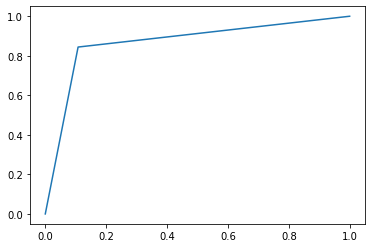

In [10]:
#Decision Tree

DT = DecisionTreeClassifier()
model = DT.fit(X_train, y_train)

preds = DT.predict(X_test)

acc = accuracy_score(y_test, preds)

fpr, tpr, _ = roc_curve(y_test, preds)

area = roc_auc_score(y_test, preds)
print("AUC score: ", area)

print("Accuracy: ", acc)

f1 = f1_score(y_test, preds)
print("F1 score: ", f1)

pre = precision_score(y_test, preds)
print("Precision score: ", pre)

recall = recall_score(y_test, preds)
print("recall score: ", recall)

plt.plot(fpr, tpr)

Confusion matrix: 
 [[207  25]
 [ 36 195]]


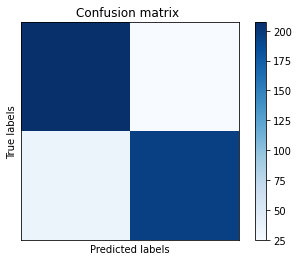

In [11]:
cm = confusion_matrix(y_test, preds)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **Support Vector Machine**

Accuracy:  0.937365010799136
AUC Score:  0.9373787132407821
F1 score:  0.9376344086021506
Precision score:  0.9316239316239316
recall score:  0.9437229437229437


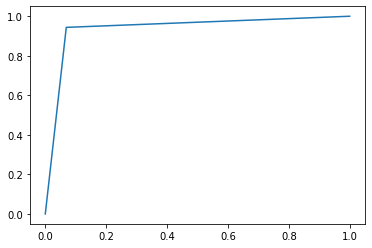

In [12]:
#SVM

svm = SVC()

model = svm.fit(X_train, y_train)

pred2 = svm.predict(X_test)

acc = accuracy_score(y_test, pred2)

fpr, tpr, _ = roc_curve(y_test, pred2)

print("Accuracy: ", acc)
plt.plot(fpr, tpr)

area = roc_auc_score(y_test, pred2)
print("AUC Score: ", area)

f1 = f1_score(y_test, pred2)
print("F1 score: ", f1)

pre = precision_score(y_test, pred2)
print("Precision score: ", pre)

recall = recall_score(y_test, pred2)
print("recall score: ", recall)

Confusion matrix: 
 [[216  16]
 [ 13 218]]


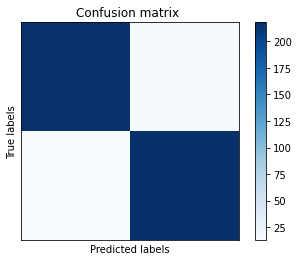

In [13]:
cm = confusion_matrix(y_test, pred2)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **Logistic Regression**

Accuracy:  0.8920086393088553
AUC Score:  0.8920081355426184
F1 score:  0.8917748917748918
Precision score:  0.8917748917748918
recall score:  0.8917748917748918


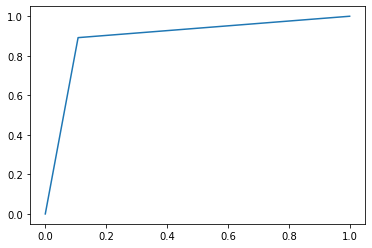

In [14]:
#Logistic Regression

LR = LogisticRegression(solver  = 'liblinear')
model = LR.fit(X_train, y_train)
pred3 = LR.predict(X_test)

acc = accuracy_score(y_test, pred3)

fpr, tpr, _ = roc_curve(y_test, pred3)

print("Accuracy: ", acc)
plt.plot(fpr, tpr)

area = roc_auc_score(y_test, pred3)
print("AUC Score: ", area)

f1 = f1_score(y_test, pred3)
print("F1 score: ", f1)

pre = precision_score(y_test, pred3)
print("Precision score: ", pre)

recall = recall_score(y_test, pred3)
print("recall score: ", recall)

Confusion matrix: 
 [[207  25]
 [ 25 206]]


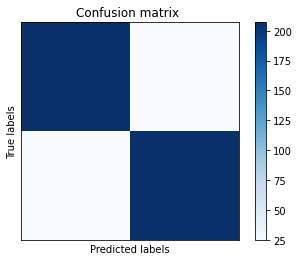

In [15]:
cm = confusion_matrix(y_test, pred3)
print('Confusion matrix: \n',cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()